<a href="https://colab.research.google.com/github/jitbnerejee4/jit/blob/fastai/Lesson1_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [10]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26).normalize()

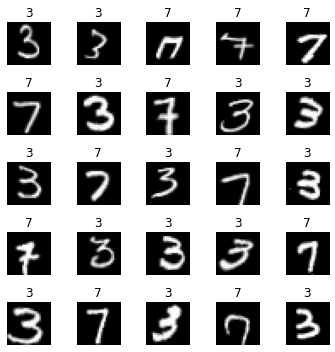

In [12]:
data.show_batch(rows=5, figsize=(5,5))

In [13]:
print(data.classes)
len(data.classes),data.c

['3', '7']


(2, 2)

In [14]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [16]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.258714,0.111910,0.036801,00:19
1,0.131398,0.054722,0.017664,00:19
2,0.088728,0.034282,0.012758,00:19
3,0.067612,0.026839,0.008832,00:19


In [0]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

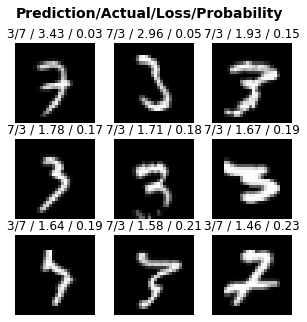

In [19]:
interp.plot_top_losses(9, figsize=(5,5))

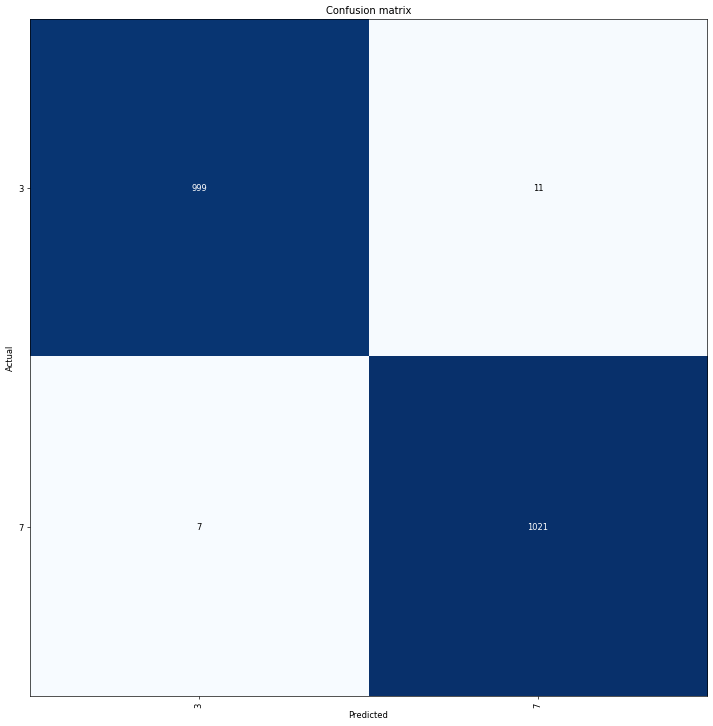

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


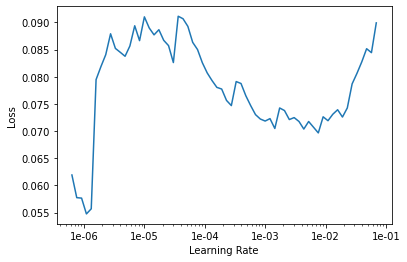

In [22]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.044106,0.011067,0.003925,00:20
1,0.028384,0.007196,0.001963,00:20
2,0.009756,0.002862,0.000491,00:20
3,0.005449,0.005582,0.000981,00:20
4,0.001128,0.002900,0.000491,00:20


In [0]:
learn.save('stage-2')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

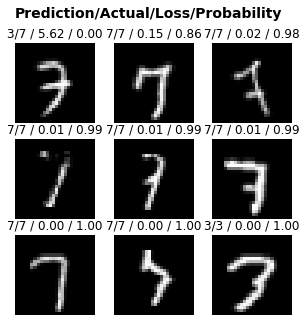

In [27]:
interp.plot_top_losses(9, figsize=(5,5))

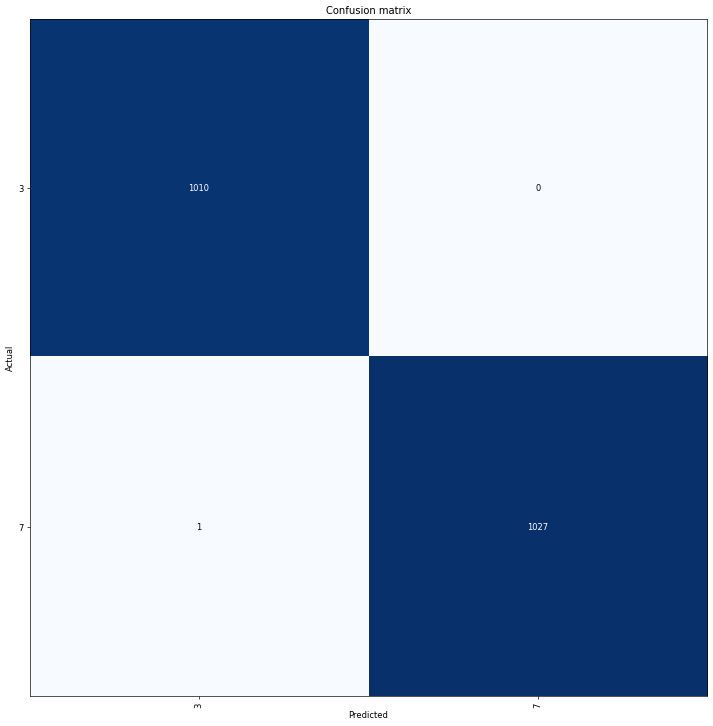

In [28]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [29]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


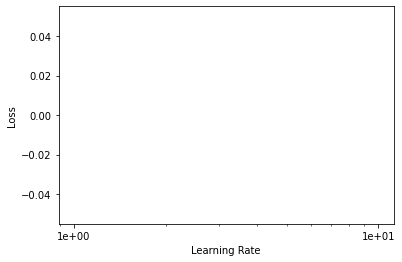

In [30]:
learn.recorder.plot()

# EXPORTING THE MODEL TO G-DRIVE


In [31]:
learn.path

PosixPath('/root/.fastai/data/mnist_sample')

In [32]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
learn.export(base_dir+ 'mylearn.pkl')

In [0]:
defaults.device= torch.device('cpu')

# TESTING WITH NEW IMAGES

In [54]:
import pandas as pd
df = pd.read_csv(path/'labels.csv')
df

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0
...,...,...
14429,valid/7/1321.png,1
14430,valid/7/8282.png,1
14431,valid/7/1949.png,1
14432,valid/7/3166.png,1


In [56]:
img = open_image(path/'train'/'3'/'26209.png')
img

In [0]:
learn = load_learner(path)

In [53]:

pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category 3

In [57]:
img2 = open_image(path/'valid'/'7'/'3166.png')
img2

In [0]:
learn = load_learner(path)

In [60]:

pred_class,pred_idx,outputs = learn.predict(img2)
pred_class

Category 7